In [1]:
from sklearn.datasets import load_breast_cancer
x,y=load_breast_cancer(return_X_y=True)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,
                                              random_state=0)


percep :- 0.9064327485380117
LR :- 0.9590643274853801
SVC :- 0.9239766081871345
DTC :- 0.9473684210526315
KNN :- 0.9473684210526315
GNB :- 0.9239766081871345
percep :- 0.003987550735473633
LR :- 0.8181521892547607
SVC :- 0.009972572326660156
DTC :- 0.003989458084106445
KNN :- 0.008974075317382812
GNB :- 0.000997781753540039


<BarContainer object of 6 artists>

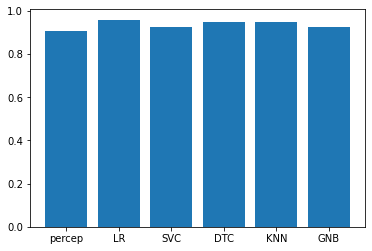

In [17]:
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
clf1=Perceptron(alpha=0.001,l1_ratio=0.2,max_iter=100)
clf2=LogisticRegression(penalty='l2',tol=0.001,C=1.0,max_iter=10000)
clf3=SVC(C=1.0,kernel='rbf') # linear
clf4=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
clf5=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
clf6=GaussianNB(priors=None)
clf=[clf1,clf2,clf3,clf4,clf5,clf6]
clf_name=['percep','LR','SVC','DTC','KNN','GNB']
acc={}
T={}#
import time#
from sklearn.metrics import accuracy_score
for model,model_name in zip(clf,clf_name):
    st=time.time()#
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    et=time.time()#
    acc[model_name]=accuracy_score(pred,y_test)
    T[model_name]=et-st#
for i,j in acc.items():
    print(i,':-',j)
for i,j in T.items(): #
    print(i,':-',j) #
import matplotlib.pyplot as plt
plt.bar(acc.keys(),acc.values())


RF :- 0.9532163742690059
ET :- 0.9415204678362573
BAG :- 0.9532163742690059
ADA :- 0.9649122807017544
GBC :- 0.9122807017543859
VOTING :- 0.9473684210526315
RF :- 0.2433488368988037
ET :- 0.13118958473205566
BAG :- 0.052378177642822266
ADA :- 0.16403985023498535
GBC :- 0.6602613925933838
VOTING :- 1.2284619808197021


<BarContainer object of 6 artists>

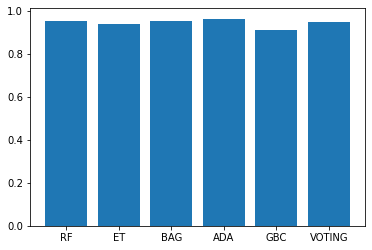

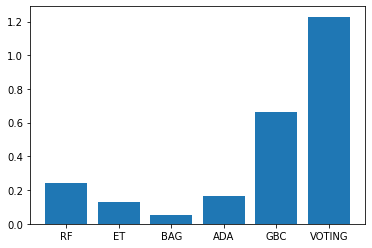

In [33]:
# bagging
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier
clf1=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5)
clf2=ExtraTreesClassifier(n_estimators=100,criterion='gini',max_depth=5)
clf3=BaggingClassifier(n_estimators=10,max_samples=1.0,max_features=1.0,
                      bootstrap=True) #base_estimator=knn
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
clf4=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)#base_estimator=knn
clf5=GradientBoostingClassifier(n_estimators=50,learning_rate=1.0,max_depth=None)
from sklearn.ensemble import VotingClassifier
clf6=VotingClassifier(estimators=[('rf',clf1),('et',clf2),('bag',clf3),('ada',clf4),
                                 ('gbc',clf5)], voting='soft',weights=[1,1,1,1,1])
clf=[clf1,clf2,clf3,clf4,clf5,clf6]
clf_name=['RF','ET','BAG','ADA','GBC','VOTING']
acc={}
T={}#
import time#
from sklearn.metrics import accuracy_score
for model,model_name in zip(clf,clf_name):
    st=time.time()#
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    et=time.time()#
    acc[model_name]=accuracy_score(pred,y_test)
    T[model_name]=et-st#
for i,j in acc.items():
    print(i,':-',j)
for i,j in T.items(): #
    print(i,':-',j) #
import matplotlib.pyplot as plt
plt.bar(acc.keys(),acc.values())
plt.figure()
plt.bar(T.keys(),T.values())